## 3. Natural Language Processing
### 1. Preprocessing the documents for analysis
#### 1. Tokenize
* First we split the lyrics in two datasets, one for training and one for testing.
* For now we will work with the training set. We use gensims simple_preprocess function, to convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

In [1]:
import gensim
from sklearn.model_selection import train_test_split
import pandas as pd
from gensim.utils import simple_preprocess

lyrics = pd.read_csv('../dataset/Lyrics_en_clean.csv', index_col=['Band','Song'])
genres = pd.read_csv('../dataset/artists_final_ohe.csv', index_col=['Band'])
df = pd.merge(lyrics, genres, on=['Band'])
train, test = train_test_split(df, test_size=0.2)
train.to_csv('../dataset/Lyrics_en_artists_clean_train.csv')
test.to_csv('../dataset/Lyrics_en_artists_clean_test.csv')
del train
del test

df = pd.read_csv('../dataset/Lyrics_en_artists_clean_train.csv')
for index, row in df.iterrows():
    lyric = row[1]
    newLyric = gensim.utils.simple_preprocess(str(lyric), deacc=True)
    df.at[index, 'Lyrics'] = newLyric
df  

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


,Band,Lyrics,'n,a,abstract,accordion,acid,acoustic,adoracao,adult,...,western,wonky,world,worship,wrestling,ye,zapstep,zolo,zouk,zydeco
0,Exhorder,"[youve, given, your, life, to, decadent, goals...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Heart,"[hands, on, the, wheel, gridlock, and, steel, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Missing Persons,"[feel, was, lost, never, meant, to, be, found,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Elmore James,"[feel, bad, feel, terrible, im, just, as, sad,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lumidee,"[could, never, accept, reality, in, which, was...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Oasis,"[live, my, life, in, the, city, theres, no, ea...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Carly Simon,"[the, lies, that, you, tell, will, leave, you,...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,Trina,"[da, bitch, is, back, say, da, bitch, is, back...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Donny Osmond,"[this, is, the, moment, this, is, the, day, wh...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,The Darkness,"[cant, get, rid, of, you, dont, know, what, to...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. Create bigrams and trigrams models
Use gensim Phraser to detect phrases, a phrase is a token formed by two (bigram) or more words. 

For example New and York may appear together very often, this process will detect them and join them as a single token New_York.

In [5]:
from gensim.models.phrases import Phrases, Phraser

lyrics = list()
for i in range(0, df.shape[0]):
    lyric = df.iloc[i][1]
    lyrics.append(lyric)
df
    
bi_prhases = Phrases(lyrics, min_count=5, threshold=40)
tri_prhases = Phrases(bi_prhases[lyrics], threshold=40)  

bigram = Phraser(bi_prhases)
trigram = Phraser(tri_prhases)


C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


#### 3. Remove stop words
There are words that have no meaning to our dataset. We use nltk stop words, add a couple of words (s and chorus) and then remove them from our dataset. 

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['s', 'chorus'])

new_lyrics = list()
for lyric in lyrics:
    new_lyric = list()
    for word in lyric:
        if(word not in stop_words):
            new_lyric.append(word)
    new_lyrics.append(new_lyric)
    
#print(lyrics[0])
#print(new_lyrics[0])
lyrics = new_lyrics
del new_lyrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jescobedo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4. Lemmatize words
The are words that have no meaning, removed in previous step, but there are words with the same meaning as others (e.g. am, are, is = be). This time we use spacy to transform these words, only keeping nouns, adjetives, verbs and adverbs. 

In [7]:
bigram_lyrics = list()
for lyric in lyrics:
    bigram_lyrics.append(bigram[lyric])
lyrics = bigram_lyrics
del bigram_lyrics

In [8]:
import spacy
import en_core_web_sm

# python -m spacy download en
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
lemma_lyrics = list()
for lyric in lyrics:
    doc = nlp(" ".join(lyric)) 
    lemma_lyric = list()
    for token in doc:
        if(token.pos_ in allowed_postags):
            lemma_lyric.append(token.lemma_)
    lemma_lyrics.append(lemma_lyric)


print(lemma_lyrics[:1])
lyrics = lemma_lyrics

[['have', 'give', 'life', 'decadent', 'goal', 'bless', 'look', 'eye', 'repent', 'mass', 'night', 'sex', 'sinister', 'prize', 'beg', 'get', 'knee', 'pray', 'well', 'all', 'cast', 'first', 'stone', 'pride', 'lust', 'whore', 'night', 'drown', 'pleasure', 'inhale', 'love', 'bring', 'hatred', 'lie', 'await', 'indulgence', 'find', 'home', 'bear', 'blasphemer', 'die', 'cry', 'soul', 'damn', 'sky', 'communion', 'longer', 'suffice', 'flame', 'rise', 'demise', 'confession', 'lie']]


In [9]:
import pickle

#SAVE LYRICS to disk
with open('../dataset/lemma_lyrics_train', 'wb') as fp:
    pickle.dump(lemma_lyrics, fp)
del lemma_lyrics

Most common words

In [10]:
from collections import Counter

words = list()
for lyric in lyrics:
    for word in lyric:
        words.append(word)

word_freq = Counter(words)

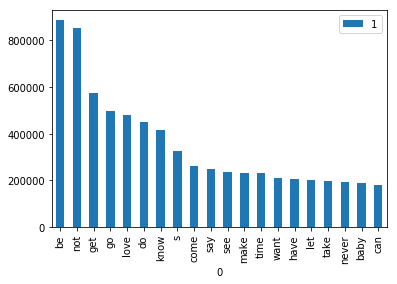

In [11]:
import pandas as pd
%matplotlib inline

df = pd.DataFrame.from_dict(word_freq.most_common(20))
df.plot(x=0, kind ='bar')

### 2. Dictionary
#### 1. Create corpus

In [12]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

id2word = corpora.Dictionary(lyrics)
id2word.save("../dataset/lemma_lyrics_train_dict")

bow_corpus = list()

for lyric in lyrics:
    bow_corpus.append(id2word.doc2bow(lyric))

tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]
print(bow_corpus[0])
print(tfidf_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]
[(0, 0.19687486682790933), (1, 0.16576755918452651), (2, 0.0898024024728296), (3, 0.12046375193969545), (4, 0.2887137264996446), (5, 0.12386691385985439), (6, 0.06974818826051968), (7, 0.13690519067025578), (8, 0.22998072409769046), (9, 0.180039177314434), (10, 0.06541717642242131), (11, 0.10242690634409377), (12, 0.256771043653542), (13, 0.18780633039235314), (14, 0.06560793798597533), (15, 0.12082279832425284), (16, 0.04668722302884407), (17, 0.04490822738039442), (18, 0.07962449871445394), (19, 0.10978200758939857), (20, 0.020957350759191782

#### 6. Word2Vec

In [13]:
from gensim.models.word2vec import Word2Vec

word2vec = Word2Vec(lyrics, workers=4, iter=3)
word_vectors = word2vec.wv
word2vec.save("../dataset/word2vec")

In [14]:
word_vectors.similar_by_word("love")

[('loving', 0.7502729296684265),
 ('baby', 0.6895380020141602),
 ('true', 0.6719269752502441),
 ('know', 0.666519284248352),
 ('darling', 0.6553927659988403),
 ('unconditional', 0.6393495798110962),
 ('want', 0.6328312754631042),
 ('heart', 0.6235368251800537),
 ('darlin', 0.6204294562339783),
 ('give', 0.6028942465782166)]

In [15]:
word_vectors.similar_by_word("hate")

[('jealousy', 0.5478307604789734),
 ('envy', 0.5122020840644836),
 ('suffer', 0.5009539723396301),
 ('relate', 0.4845621585845947),
 ('hatred', 0.4722989797592163),
 ('hater', 0.47106990218162537),
 ('anger', 0.4707857072353363),
 ('tolerate', 0.4615577161312103),
 ('debate', 0.4562164843082428),
 ('worst_enemy', 0.45264697074890137)]

In [16]:
word_vectors.similar_by_word("god")

[('holy', 0.6329371929168701),
 ('bless', 0.6200424432754517),
 ('almighty', 0.6178418397903442),
 ('lord', 0.6115849018096924),
 ('pray', 0.6114975810050964),
 ('blessed', 0.5861982107162476),
 ('grace', 0.581980288028717),
 ('savior', 0.5815690755844116),
 ('forgif', 0.5763567686080933),
 ('saviour', 0.5717598795890808)]

In [17]:
word_vectors.similar_by_word("dog")

[('bark', 0.721328616142273),
 ('cat', 0.6756749153137207),
 ('leash', 0.5832235813140869),
 ('woof', 0.5778262615203857),
 ('buying_chihuahua', 0.543731689453125),
 ('waggin', 0.5247211456298828),
 ('hog', 0.523919939994812),
 ('wolf', 0.5199141502380371),
 ('doggy', 0.5101379156112671),
 ('kennel', 0.48979413509368896)]

### 7. Doc2Vec

In [18]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_lyrics = [TaggedDocument(lyric, [i]) for i, lyric in enumerate(lyrics)]

doc2vec = Doc2Vec(tagged_lyrics, workers=4, epochs=3)
doc_vectors = doc2vec.wv

doc2vec.save("../dataset/doc2vec")

In [19]:
doc_vectors.similar_by_word("love")

[('baby', 0.7686097621917725),
 ('know', 0.761877715587616),
 ('want', 0.7402997612953186),
 ('true', 0.7275775074958801),
 ('loving', 0.725251317024231),
 ('heart', 0.7181241512298584),
 ('give', 0.7165185213088989),
 ('never', 0.7155487537384033),
 ('because', 0.7136131525039673),
 ('need', 0.7073761224746704)]

In [20]:
doc_vectors.similar_by_word("hate")

[('because', 0.5731129050254822),
 ('jealousy', 0.5547696948051453),
 ('suffer', 0.5310215353965759),
 ('hurt', 0.5280517339706421),
 ('wanna', 0.5229649543762207),
 ('hater', 0.5222195386886597),
 ('fuck', 0.5214160680770874),
 ('love', 0.5124760866165161),
 ('want', 0.5106446146965027),
 ('know', 0.5089753866195679)]

In [21]:
doc_vectors.similar_by_word("god")

[('lord', 0.6724822521209717),
 ('pray', 0.6461926698684692),
 ('bless', 0.6394868493080139),
 ('holy', 0.6058257818222046),
 ('earth', 0.5848382711410522),
 ('grace', 0.5814449787139893),
 ('mercy', 0.5769387483596802),
 ('faith', 0.5765249729156494),
 ('heaven', 0.5763488411903381),
 ('angel', 0.5710024833679199)]

In [22]:
doc_vectors.similar_by_word("dog")

[('cat', 0.6821424961090088),
 ('bark', 0.6118555665016174),
 ('bone', 0.5166987776756287),
 ('bite', 0.5125272870063782),
 ('buying_chihuahua', 0.510101318359375),
 ('wolf', 0.5045941472053528),
 ('shit', 0.48957616090774536),
 ('bitch', 0.48155730962753296),
 ('leash', 0.4673544764518738),
 ('nigga', 0.4609489440917969)]